In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('sample.csv')
print(train.shape, test.shape, submission.shape)

(59397, 7) (1092, 5) (1092, 2)


In [3]:
print(train.head(3))
print(test.head(3))
print(submission.head(3))

                ID   timestamp item corporation location  supply(kg)  \
0  TG_A_J_20190101  2019-01-01   TG           A        J         0.0   
1  TG_A_J_20190102  2019-01-02   TG           A        J         0.0   
2  TG_A_J_20190103  2019-01-03   TG           A        J     60601.0   

   price(원/kg)  
0          0.0  
1          0.0  
2       1728.0  
                ID   timestamp item corporation location
0  TG_A_J_20230304  2023-03-04   TG           A        J
1  TG_A_J_20230305  2023-03-05   TG           A        J
2  TG_A_J_20230306  2023-03-06   TG           A        J
                ID  answer
0  TG_A_J_20230304       0
1  TG_A_J_20230305       0
2  TG_A_J_20230306       0


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59397 entries, 0 to 59396
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           59397 non-null  object 
 1   timestamp    59397 non-null  object 
 2   item         59397 non-null  object 
 3   corporation  59397 non-null  object 
 4   location     59397 non-null  object 
 5   supply(kg)   59397 non-null  float64
 6   price(원/kg)  59397 non-null  float64
dtypes: float64(2), object(5)
memory usage: 3.2+ MB


In [5]:
train.describe()

,supply(kg),price(원/kg)
count,5.939700e+04,59397.000000
mean,1.189453e+04,1131.680674
std,5.226400e+04,2029.941445
min,0.000000e+00,0.000000
25%,0.000000e+00,0.000000
50%,0.000000e+00,0.000000
75%,3.800000e+03,1519.000000
max,1.222800e+06,20909.000000


In [6]:
train.isnull().sum()

ID             0
timestamp      0
item           0
corporation    0
location       0
supply(kg)     0
price(원/kg)    0
dtype: int64

In [7]:
price = (train['price(원/kg)'] == 0).sum()
price

35455

In [8]:
unique_items = sorted(train['item'].unique())

label_mapping = {item: i+1 for i, item in enumerate(unique_items)}

train['label'] = train['item'].map(label_mapping)

train[['item', 'label']]

,item,label
0,TG,5
1,TG,5
2,TG,5
3,TG,5
4,TG,5
...,...,...
59392,RD,4
59393,RD,4
59394,RD,4
59395,RD,4


c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\user\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


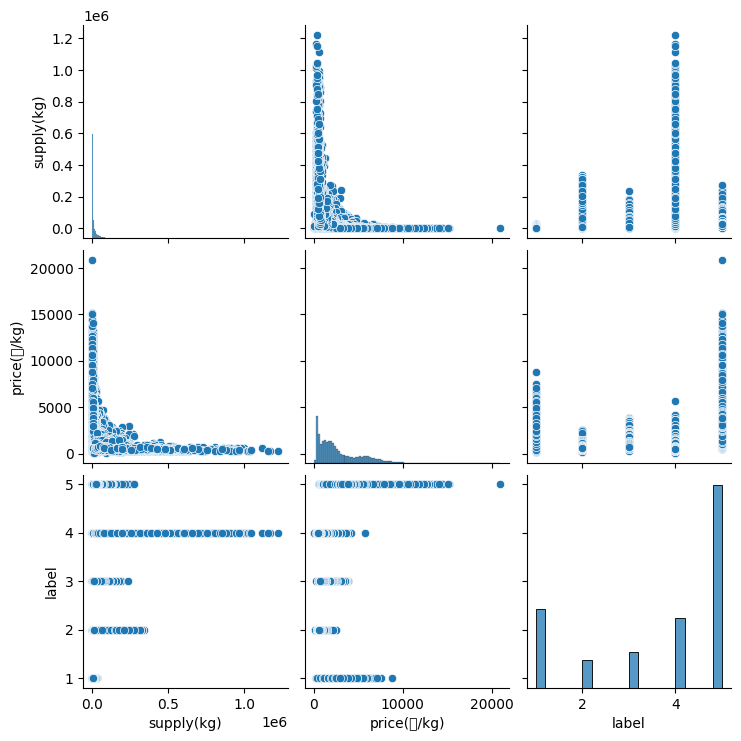

In [9]:
data = train[train['price(원/kg)'] != 0]

# pairplot 그리기
sns.pairplot(data)
plt.show()

In [10]:
data.columns

Index(['ID', 'timestamp', 'item', 'corporation', 'location', 'supply(kg)',
       'price(원/kg)', 'label'],
      dtype='object')

c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.draw()
C:\Users\user\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


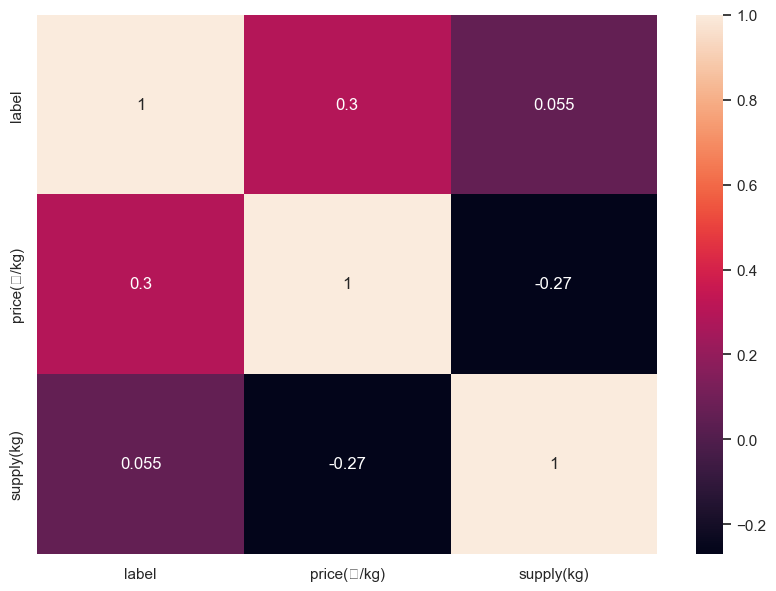

In [11]:
plt.figure(figsize=(10,7))
sns.set(font_scale=1.0)
sns.heatmap(data[['label', 'price(원/kg)', 'supply(kg)']].corr(), annot=True, cbar=True)
plt.show()

In [12]:
from sklearn.model_selection import train_test_split
X_data = data.loc[:,['label', 'supply(kg)']]
y_data = data.loc[:, 'price(원/kg)']
x_train, x_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, shuffle=True, random_state=12)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(19153, 2) (19153,)
(4789, 2) (4789,)


In [13]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

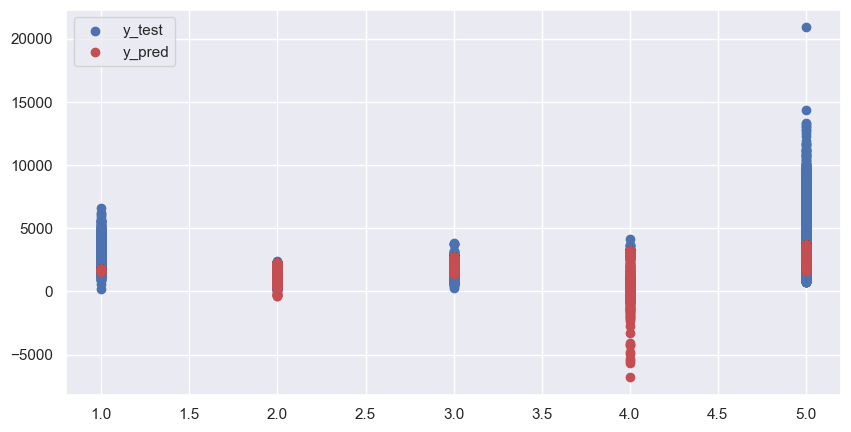

In [14]:
# 예측
y_test_pred = lr.predict(x_test)

# 예측값 실제값의 분포
plt.figure(figsize=(10,5)) # 그림또는 도표로 나타내기
plt.scatter(x_test['label'], y_test, label='y_test')
plt.scatter(x_test['label'], y_test_pred, c='r', label='y_pred')
plt.legend(loc='best')
plt.show()

In [15]:
from sklearn.metrics import mean_squared_error
y_train_pred = lr.predict(x_train)

train_mse = mean_squared_error(y_train, y_train_pred)
print("Train MSE:%3f" % train_mse)

Train MSE:4554401.574845


In [16]:
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree=2)
x_train_poly = pf.fit_transform(x_train)
print("원본 학습 데이터 셋:", x_train.shape) # 2개인 이유 LATST, RM 이 두가지 값을 가지기 때문이고
print("2차 다항식 변환 데이터 셋:", x_train_poly.shape)

원본 학습 데이터 셋: (19153, 2)
2차 다항식 변환 데이터 셋: (19153, 6)


In [17]:
lr = LinearRegression()
lr.fit(x_train_poly, y_train) # y_train은 실제 결과값

# 테스트 데이터에 대한 예측 밒 평가
y_train_pred = lr.predict(x_train_poly)
train_mse = mean_squared_error(y_train, y_train_pred)
print("Train MSE:%3f" % train_mse)

Train MSE:3004224.381181


In [18]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from dateutil.relativedelta import relativedelta

In [19]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import GridSearchCV

# param_grid = {
#     'n_estimators': [10, 20, 50, 100],
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 5, 10], # 혹시나 오래 걸린다면 빼자
#     'min_samples_leaf': [1, 2, 4], # 혹시나 오래 걸린다면 빼자
#     'max_features': ['auto', 'sqrt', 'log2'],
#     'bootstrap': [True, False],
#     'criterion': ['gini', 'entropy']
# } # n_estimators 값을 딕셔너리 형태로 설정
# forest = RandomForestClassifier(random_state=42)
# grid_search = GridSearchCV(forest, param_grid, cv=5)  # 5-fold cross validation
# grid_search.fit(x_train, y_train)

# print(f"Best parameters: {grid_search.best_params_}")
# print(f"Best cross-validation score: {grid_search.best_score_}")

In [20]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [21]:
from xgboost import XGBRegressor

xgbr = XGBRegressor()

xgbr.fit(x_train, y_train)

y_pred = xgbr.predict(x_test)
y_pred

array([1110.703  , 6356.3037 , 3894.2864 , ...,  430.77985, 2148.7961 ,
       2727.5588 ], dtype=float32)

In [22]:
# LSTM 모델 구축
lstm_model = Sequential()
lstm_model.add(LSTM(50, return_sequences=True, input_shape=(1,2)))
lstm_model.add(LSTM(50, return_sequences=False))
lstm_model.add(Dense(25))
lstm_model.add(Dense(1))

In [23]:
x_train = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))

In [24]:
lstm_model.compile(optimizer='adam', loss='mean_squared_error')
lstm_model.fit(x_train, y_train, batch_size=1, epochs=20)

Epoch 1/20
19153/19153 [==============================] - 31s 2ms/step - loss: 5843199.5000
Epoch 2/20
19153/19153 [==============================] - 31s 2ms/step - loss: 5491907.5000
Epoch 3/20
19153/19153 [==============================] - 38s 2ms/step - loss: 5492346.5000
Epoch 4/20
19153/19153 [==============================] - 40s 2ms/step - loss: 5492113.0000
Epoch 5/20
19153/19153 [==============================] - 39s 2ms/step - loss: 5492587.5000
Epoch 6/20
19153/19153 [==============================] - 39s 2ms/step - loss: 5492864.0000
Epoch 7/20
19153/19153 [==============================] - 38s 2ms/step - loss: 5492564.5000
Epoch 8/20
19153/19153 [==============================] - 37s 2ms/step - loss: 5491613.0000
Epoch 9/20
19153/19153 [==============================] - 40s 2ms/step - loss: 5491592.5000
Epoch 10/20
19153/19153 [==============================] - 44s 2ms/step - loss: 5492265.5000
Epoch 11/20
19153/19153 [==============================] - 39s 2ms/step - loss: